In [53]:
import pandas as pd
from IPython.display import display, HTML

#Get data and display the first 5 rows
df = pd.read_csv('Reviews.csv')
print('\033[1m' + 'Dimensions:' + '\033[0m','\nNumber of rows:',df.shape[0] ,'\nNumber of features:',df.shape[1])
data = df.sample(n=50000, replace=False, random_state=1)
print('\033[1m' + 'Dimensions after sampling:' + '\033[0m','\nNumber of rows:',data.shape[0] ,'\nNumber of features:',data.shape[1])
print('\033[1m' + 'Data:' + '\033[0m')
display(HTML(data.head(2).to_html())) 

Dimensions: 
Number of rows: 568454 
Number of features: 10
Dimensions after sampling: 
Number of rows: 50000 
Number of features: 10
Data:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
288312,288313,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,"I love the Cherry Pie Lara bar. Best and tasty bar for when my sugar is low. I recomend this Bar for diabetics low sugar only, as the carbs are about 30 for the bar."
431726,431727,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,Melitta Coffee,"Melitta Cafe COllection Blanc et Noir coffee has a very smooth, refined armoma you notice as soon as you open up the package. That same aroma translates well throughout the brewing process and remains once poured into your cup. Once you taste it, you will find that the flavor is bold yet smooth, it has a slightly dark, powerful flavor without any of the coarseness or bitterness. I went directly from one of those high-pressure coffee pod brewing systems to using the Melitta in a percolator, and it seems Melitta has helped me find my way back to a better cup of coffee."


In [54]:
#Data preprcoessing - Missing values
import numpy as np

#Look for missing values
print('\n\033[1m' + 'Number of missing data in each column:' + '\033[0m\n',data.isnull().sum())

print ("\n{:<35} {:<40} {:<30}".format('\033[1m'+'Column Name'+'\033[0m','\033[1m'+'Column DataType'+'\033[0m','\033[1m'+'Missing Values'+'\033[0m'))
cols=data.columns
for i in cols:
    print( "{:<30} {:<30} {:<30}".format(i,str(data[i].dtype),str(data[i].isnull().any())))

#Check if user 'Unknown User' already exists in the dataframe
if((data[data['ProfileName'].str.contains("Unknown User")==True]).empty):
    print('\nNo records called Unknown User.\n')

#Display all the rows with ProfileName as NaN
print('\n\033[1m' + 'The null values in column ProfileName:' + '\033[0m\n')
display(HTML(data[data["Summary"].isnull()].head(5).to_html()))

#Replace the NaN values with global constant 'Unknown User' and display the subset where profileName was replaced
data['ProfileName'] = data['ProfileName'].replace(np.nan, "Unknown User")
print('\n\033[1m' +'The null values in column ProfileName after replacing with Unknow User:' + '\033[0m')
display(HTML(data[data['ProfileName'].str.contains("Unknown User")].head(5).to_html()))

#Drop all the rows with Summary as Nan
data.dropna(axis = 0, how ='any', subset =['Summary'], inplace = True)

#Check if all data is replaced and removed
print('\n\033[1m' + 'Number of missing data in each column:' + '\033[0m\n',data.isnull().sum())


Number of missing data in each column:
 Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   5
Text                      0
dtype: int64

Column Name                 Column DataType                  Missing Values        
Id                             int64                          False                         
ProductId                      object                         False                         
UserId                         object                         False                         
ProfileName                    object                         False                         
HelpfulnessNumerator           int64                          False                         
HelpfulnessDenominator         int64                          False                         
Score                  

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
237565,237566,B000ELGPAO,A15AMT9T9A1309,Film-Friend,1,1,3,1328572800,NaN,"This is a cool system only problem is that the coffee is no longer hot once it drains into your cup. If you are using it to make ice coffee though, it's great!"
155712,155713,B0009VO58S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either."
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either."
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either."
198474,198475,B000FVBYCW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either."



The null values in column ProfileName after replacing with Unknow User:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text



Number of missing data in each column:
 Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64



Score and Number of reviews:
 5    32059
4     7020
1     4606
3     3752
2     2558
Name: Score, dtype: int64

Data frame with all values:



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Class Label,Reviews
288312,288313,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,"I love the Cherry Pie Lara bar. Best and tasty bar for when my sugar is low. I recomend this Bar for diabetics low sugar only, as the carbs are about 30 for the bar.",1,"Cherry Pie LarabarI love the Cherry Pie Lara bar. Best and tasty bar for when my sugar is low. I recomend this Bar for diabetics low sugar only, as the carbs are about 30 for the bar."



Data frame with only required columns:



,Reviews,Class Label
288312,"Cherry Pie LarabarI love the Cherry Pie Lara bar. Best and tasty bar for when my sugar is low. I recomend this Bar for diabetics low sugar only, as the carbs are about 30 for the bar.",1
431726,"Melitta CoffeeMelitta Cafe COllection Blanc et Noir coffee has a very smooth, refined armoma you notice as soon as you open up the package. That same aroma translates well throughout the brewing process and remains once poured into your cup. Once you taste it, you will find that the flavor is bold yet smooth, it has a slightly dark, powerful flavor without any of the coarseness or bitterness. I went directly from one of those high-pressure coffee pod brewing systems to using the Melitta in a percolator, and it seems Melitta has helped me find my way back to a better cup of coffee.",1
110311,great treatmy girls absolutely loved this tuna. they were in heaven and couldn't get enough of this tasty treat. A bit pricey since I do have 4 cats and the pack went super fast giving each of them a treat,1
91855,Daily CalmingThe vendor is fast and dependable. The tea is simply the best way to relax and great tasting too. Highly recommend !!,1
338855,"Best Canned Artichokes Out There!UPDATE - 8/9/2010<br />A lot can happen in just a couple months, the last two cases of these I have ordered from Amazon have been horrible. I've had whole artichoke leaves in several cans (not the small soft leaves near the heart, I'm talking the big tough artichoke leaves). Brown spots over many of the artichokes. Very poor quality.<br /><br />I contacted Amazon both times, the first time they replaced the case and the quality was much better. The second time I asked them for a refund because two times in a couple months is not acceptable. I also contacted Reese direcly who doubted me and asked me to ""prove it"" by sending them two cans at my expense. I told them I'd gladly send them all the cans at their expense, but they would not do that. My impression of Reese has changed very much and I will no longer buy their products.<br /><br />ORIGINAL REVIEW - I've tried just about every brand out there and Reese, by far, is the best! I love that you can buy them already quartered, great for tossing into salads.<br /><br />They are always good quality, not too firm, not too soft. Consistent taste, never a bad one in any can. Best price on Amazon too, about $1 cheaper per can then my local grocery store.",1


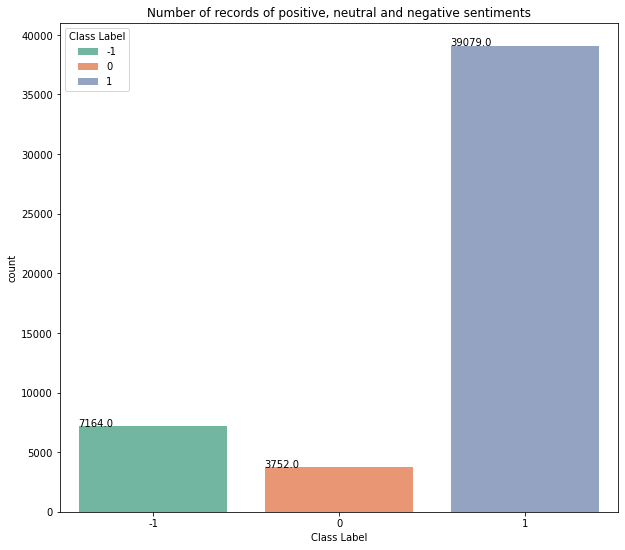

In [55]:
import matplotlib.pyplot as plt
import seaborn as sn

#Learning about the column Score  
print('\n\033[1m' + 'Score and Number of reviews:' + '\033[0m\n',data.Score.value_counts())

#Function definition for Score to be a sentiment (-1,0,1) => (Negative, Neutral and Positive)
def score_round(x):
    if x <= 2:
        return -1
    elif x == 3:
        return 0
    else: 
        return 1

#Add a new column to the dataframe called 'Class Label' to assign the sentiments
data['Class Label']=data['Score'].apply(score_round)

#Add new column to the dataframe called 'Reviews' which contains both text and summary cloumns data concatenated
data['Reviews'] = data['Summary'] + data['Text']

print('\n\033[1m' + 'Data frame with all values:' + '\033[0m\n')
display(HTML(data.head(1).to_html())) 

#Creating a new dataframe with only required columns
review = data[['Reviews', 'Class Label']]
print('\n\033[1m' + 'Data frame with only required columns:' + '\033[0m\n')
display(HTML(review.head(5).to_html())) 

#Create a count plot to compare the number of positive,neutral and negative sentiments
plt.figure(figsize=(10,9))
plt.title("Number of records of positive, neutral and negative sentiments")
plot = sn.countplot(x = 'Class Label', data = review, hue = 'Class Label', dodge=False, palette="Set2")
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() ,p.get_height()))
    

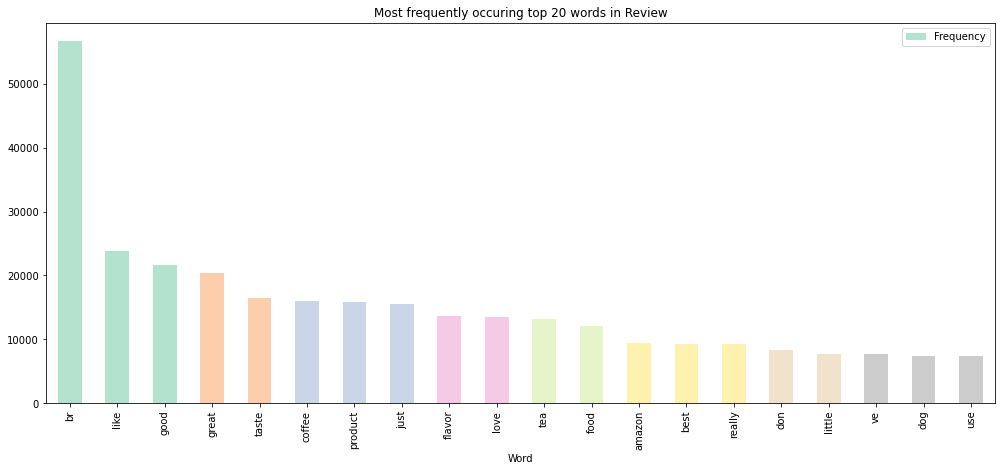

In [9]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

#Plot for most frequently occuring words
cv = CountVectorizer(stop_words = 'english')
ReviewWords = cv.fit_transform(review.Reviews)
ReviewWordsSum = ReviewWords.sum(axis=0)
ReviewWordsFrequency = [(word, ReviewWordsSum[0, idx]) for word, idx in cv.vocabulary_.items()]
ReviewWordsFrequency = sorted(ReviewWordsFrequency, key = lambda x: x[1], reverse = True)
ReviewWordsData = pd.DataFrame(ReviewWordsFrequency, columns=['Word', 'Frequency'])
ReviewWordsData.head(20).plot(x='Word', y = 'Frequency', kind='bar',figsize=(17,7), color = plt.cm.Pastel2(np.linspace(0, 1, 20)))
plt.title('Most frequently occuring top 20 words in Review')
plt.show()

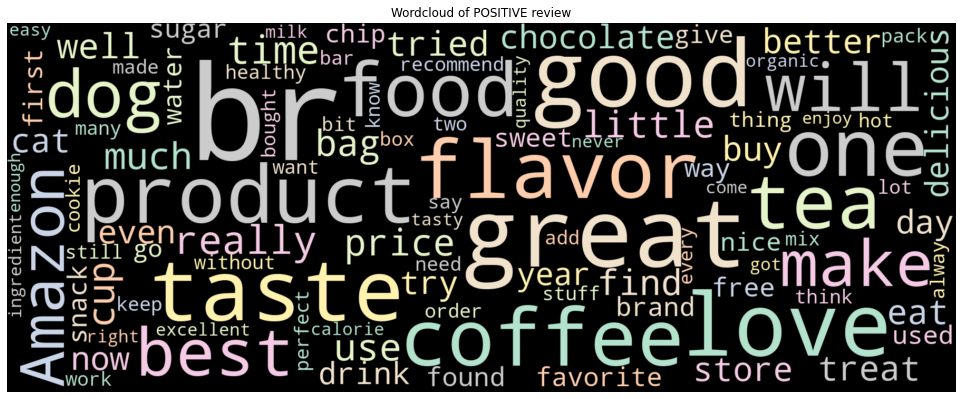

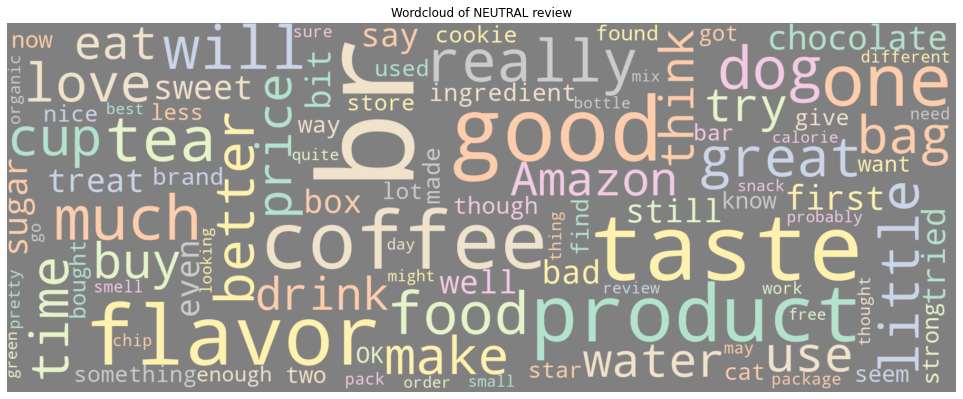

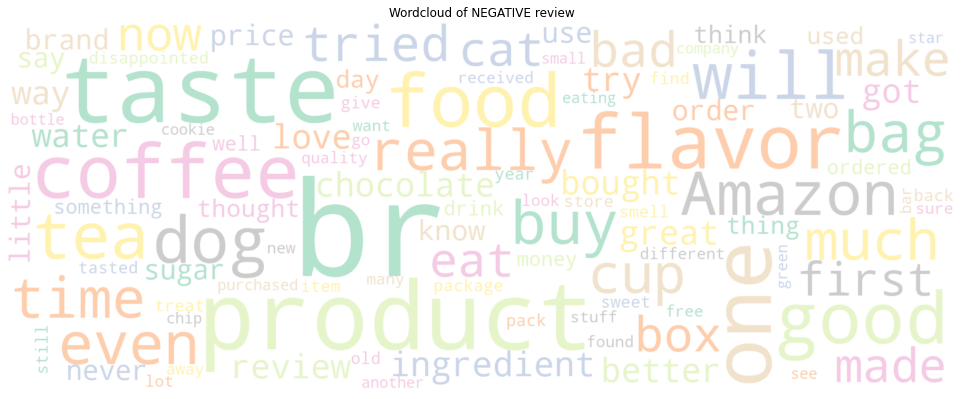

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

review_positive = review[review['Class Label']== 1]
review_neutral = review[review['Class Label']== 0]
review_negative = review[review['Class Label']== -1]

#Wrodcloud for Reviews
txt = ' '.join(rev for rev in review_positive.Reviews)
wordcloud = WordCloud(background_color = 'black',colormap='Pastel2',max_font_size = 250,max_words = 100,width = 1800,height = 700,collocations = False).generate(txt)
plt.figure(figsize=(17,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title("Wordcloud of POSITIVE review")
plt.show()

txt = ' '.join(rev for rev in review_neutral.Reviews)
wordcloud = WordCloud(background_color = 'grey',colormap='Pastel2',max_font_size = 250,max_words = 100,width = 1800,height = 700,collocations = False).generate(txt)
plt.figure(figsize=(17,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title("Wordcloud of NEUTRAL review")
plt.show()

txt = ' '.join(rev for rev in review_negative.Reviews)
wordcloud = WordCloud(background_color = 'white',colormap='Pastel2',max_font_size = 250,max_words = 100,width = 1800,height = 700,collocations = False).generate(txt)
plt.figure(figsize=(17,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title("Wordcloud of NEGATIVE review")
plt.show()

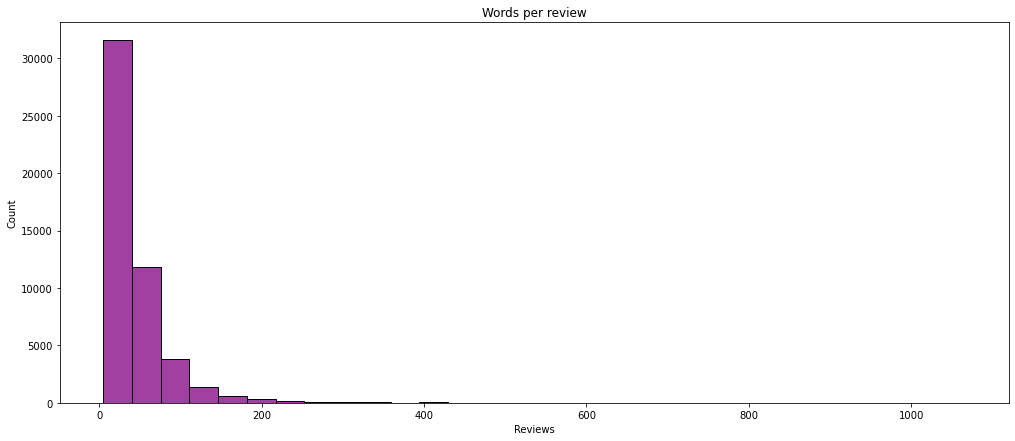

In [32]:
#Visualizing textual data
import matplotlib.pyplot as plt
import seaborn as sns

#Plots for words per review for both Summary and Text
WordsPerReview = review['Reviews'].apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(17,7))
sns.histplot(data=WordsPerReview,bins = 30,color='purple')
plt.title('Words per review')
plt.show()

In [56]:
#TEXT PREPROCESSING

# nltk.download('punkt')
# nltk.download('stopwords')
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

def clean(text):
    #Remove all HTML tags
    result = re.sub("<.*?>", "", text)
    #Remove hyperlinks and markup
    result = re.sub("<[a][^>]*>(.+?)</[a]>", '', result)
    #Remove line break
    result = re.sub("\n", '', result)
    #Remove unicode character encoding Solidus (/)
    result = re.sub('&#x2F;', '/', result)
    #Replace unicode character encoding Apostrophe(')
    result = re.sub('&#x27;', "'", result)
    #Replace encoding Quote(')
    result = re.sub('&quot;', '"', result)
    #Remove unicode character greater than
    result = re.sub('&gt;', '', result)
    result = re.sub('&#62;', '', result)
    #Remove unicode character lesser than
    result = re.sub('&lt;', '', result)
    result = re.sub('&#60;', '', result)
    #Remove numbers
    result = re.sub(r'\d+', '', result)
    #Remove special characters
    result = "".join(u for u in result if u not in (".", ",", "?", "!", ":", ";", "@", "#", "$","'", '"', "@", "#", "-", "/"))
    #Convert to lower case
    result = str(result).lower()
    return result

#Strip out additional spaces
def remove_space(text):
    result = re.sub(' +', ' ', text)
    return result

#Remove all stopwords
def remove_stopword(text):
    stop=set(stopwords.words("english"))
    stopword=[word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(stopword)

#Word tokenization
def tokenization(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens

#Stemming
def stemming(text):
    stem = []
    snowball_stemmer = SnowballStemmer('english')
    stemmed_word = [snowball_stemmer.stem(word) for word in tokenization(text)]
    stem = ' '.join(stemmed_word)
    return stem

#Lemmatization
def lemmatizing(text):
    lemma = []
    lemmatizer = WordNetLemmatizer()
    lemmatized_word = [lemmatizer.lemmatize(word) for word in tokenization(text)]
    lemma = ' '.join(lemmatized_word)
    return lemma

#Combining all the above functions to one function
def TextProcessing(DataFrame,Column):
    DataFrame[Column] = DataFrame[Column].apply(clean)
    DataFrame[Column] = DataFrame[Column].apply(remove_stopword)
    DataFrame[Column] = DataFrame[Column].apply(remove_space)
    DataFrame[Column] = DataFrame[Column].apply(stemming)
    DataFrame[Column] = DataFrame[Column].apply(lemmatizing)

#Calling the combined function on both Summary and text columns and replacing it
TextProcessing(review,'Reviews')

#Output the result
print('\n\033[1m' + 'Dataframe after text processing:' + '\033[0m\n')
review.head(10)
# review.drop(labels=['Summary'],axis=1)


Dataframe after text processing:



,Reviews,Class Label
288312,cherri pie larabari love cherri pie lara bar b...,1
431726,melitta coffeemelitta cafe collect blanc et no...,1
110311,great treatmi girl absolut love tuna heaven co...,1
91855,daili calmingth vendor fast depend tea simpli ...,1
338855,best can artichok thereupd lot happen coupl mo...,1
243608,wowi pretti much tri dark chocol fruit mix per...,1
152343,love productjust forewarn bit moist plenti pap...,1
336202,amaz treat great valueboth mix terrier dog pre...,1
488611,cant drink itmad coffe percol mayb wrong metho...,-1
103618,everyth neededthi basic ingredi could found lo...,1


In [11]:
#Creating word vectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Creating word vectors using Count Vectorizer
X = review['Reviews'] 
Y = review['Class Label'] 

print('\n\033[1m' + 'Count Vectorizer' + '\033[0m')
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(X)
X = vectorizer.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#Check for same dimensions for number of features
print("n_samples: %d, n_features: %d" % x_train.shape)
print("n_samples: %d, n_features: %d" % x_test.shape)
#Printing the identified Unique words along with their indices
# print("\nVocabulary: ", vectorizer.vocabulary_)
# print("\nVocabulary: ", vectorizer1.vocabulary_)


#Creating word vectors using TFID Vectorizer
X1 = review['Reviews'] 
Y1 = review['Class Label'] 

print('\n\033[1m' + 'TFIDF Vectorizer' + '\033[0m')
tf_idf = TfidfVectorizer()
tf_idf = tf_idf.fit(X1)
X1 = tf_idf.transform(X1)
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2)

#Check for same dimensions for number of features
print("n_samples: %d, n_features: %d" % x1_train.shape)
print("n_samples: %d, n_features: %d" % x1_test.shape)
#Printing the identified Unique words along with their indices
# print("Vocabulary: ", tf_idf.vocabulary_)
# print("Vocabulary: ", tf_idf1.vocabulary_)


Count Vectorizer
n_samples: 39996, n_features: 76399
n_samples: 9999, n_features: 76399

TFIDF Vectorizer
n_samples: 39996, n_features: 76399
n_samples: 9999, n_features: 76399


In [7]:
#KNN
from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'K-nearest neighbors using CountVectorizer' + '\033[0m')
for k in range(1, 10, 2): 
    knn=neighbors.KNeighborsClassifier(k, weights='uniform')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print('K:', k,', Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))
    
print('\n\033[1m' + 'K-nearest neighbors using TFIDFVectorizer' + '\033[0m')
for k in range(1, 10, 2): 
    knn1=neighbors.KNeighborsClassifier(k, weights='uniform')
    knn1.fit(x1_train, y1_train)
    y1_pred = knn1.predict(x1_test)
    print('K:', k,', Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))


K-nearest neighbors using CountVectorizer
K: 1 , Accuracy:  0.7681768176817682 , F1 score:  0.7527137476063818 , 
Precision:  0.7423546608930022 , Recall:  0.7681768176817682
K: 3 , Accuracy:  0.7761776177617762 , F1 score:  0.739788189714647 , 
Precision:  0.7265876485192595 , Recall:  0.7761776177617762
K: 5 , Accuracy:  0.7810781078107811 , F1 score:  0.7342115764910435 , 
Precision:  0.7211097627014861 , Recall:  0.7810781078107811
K: 7 , Accuracy:  0.7844784478447845 , F1 score:  0.7266471568196924 , 
Precision:  0.7208708839294361 , Recall:  0.7844784478447845
K: 9 , Accuracy:  0.7874787478747874 , F1 score:  0.7221007211848711 , 
Precision:  0.7170207091641265 , Recall:  0.7874787478747874

K-nearest neighbors using TFIDFVectorizer
K: 1 , Accuracy:  0.7537753775377538 , F1 score:  0.747233340451507 , 
Precision:  0.7423116737809647 , Recall:  0.7537753775377538
K: 3 , Accuracy:  0.7771777177717771 , F1 score:  0.751561903404154 , 
Precision:  0.7373757150151106 , Recall:  0.777

In [8]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'Naive Bayes using CountVectorizer' + '\033[0m')
nb = MultinomialNB()
nb = nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
# print('Confusion matrix:\n', confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))  

print('\n\033[1m' + 'Naive Bayes using TFIDFVectorizer' + '\033[0m')
nb1 = MultinomialNB()
nb1 = nb1.fit(x1_train, y1_train)
y1_pred = nb1.predict(x1_test)
# print('Confusion matrix:\n', confusion_matrix(y1_test,y1_pred))
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  


Naive Bayes using CountVectorizer
Accuracy:  0.8317831783178318 , F1 score:  0.7967206230334674 , 
Precision:  0.7886543649163769 , Recall:  0.8317831783178318

Naive Bayes using TFIDFVectorizer
Accuracy:  0.7799779977997799 , F1 score:  0.6836667910734041 , 
Precision:  0.7540850904454318 , Recall:  0.7799779977997799


In [9]:
#Decison Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'Decision Tree using CountVectorizer' + '\033[0m')
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1) 
dt=dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))

print('\n\033[1m' + 'Decision Tree using TFIDFVectorizer' + '\033[0m')
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1) 
dt1=dt1.fit(x1_train, y1_train)
y1_pred=dt1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  


Decision Tree using CountVectorizer
Accuracy:  0.7773777377737774 , F1 score:  0.6800086828399248 , 
Precision:  0.6043161471862758 , Recall:  0.7773777377737774

Decision Tree using TFIDFVectorizer
Accuracy:  0.7798779877987799 , F1 score:  0.6834285046754943 , 
Precision:  0.608209675853074 , Recall:  0.7798779877987799


In [10]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'Random Forest using CountVectorizer' + '\033[0m')
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))

print('\n\033[1m' + 'Random Forest using TFIDFVectorizer' + '\033[0m')
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf1 = rf1.fit(x1_train, y1_train)
y1_pred = rf1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))


Random Forest using CountVectorizer
Accuracy:  0.8274827482748275 , F1 score:  0.7869941253611304 , 
Precision:  0.8247135932711083 , Recall:  0.8274827482748275

Random Forest using TFIDFVectorizer
Accuracy:  0.8267826782678268 , F1 score:  0.7849439739300205 , 
Precision:  0.8235385153936874 , Recall:  0.8267826782678268


In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'Logistic Regression using CountVectorizer' + '\033[0m')
lr = LogisticRegression(solver='liblinear')
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
# print('Confusion matrix:\n', confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))


print('\n\033[1m' + 'Logistic Regression using TFIDFVectorizer' + '\033[0m')
lr1 = LogisticRegression(solver='liblinear')
lr1 = lr1.fit(x1_train,y1_train)
y1_pred = lr1.predict(x1_test)
# print('Confusion matrix:\n', confusion_matrix(y1_test,y1_pred))
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  


Logistic Regression using CountVectorizer
Accuracy:  0.8677867786778678 , F1 score:  0.8545212320901773 , 
Precision:  0.8500055811913312 , Recall:  0.8677867786778678

Logistic Regression using TFIDFVectorizer
Accuracy:  0.8563856385638564 , F1 score:  0.8257600972566204 , 
Precision:  0.8341843752537836 , Recall:  0.8563856385638564


In [12]:
#Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'SVM using CountVectorizer' + '\033[0m')
sv = SVC(kernel='linear', C=0.1)
sv = sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))

print('\n\033[1m' + 'SVM using TFIDFVectorizer' + '\033[0m')
sv1 = SVC(kernel='linear', C=0.1)
sv1 = sv1.fit(x1_train, y1_train)
y1_pred = sv1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))


SVM using CountVectorizer
Accuracy:  0.8621862186218622 , F1 score:  0.8465343188337133 , 
Precision:  0.8414708754942457 , Recall:  0.8621862186218622

SVM using TFIDFVectorizer
Accuracy:  0.8161816181618162 , F1 score:  0.7570000134222522 , 
Precision:  0.7648099044606939 , Recall:  0.8161816181618162


In [13]:
#ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'ANN using CountVectorizer' + '\033[0m')
mlp=MLPClassifier(solver='adam', max_iter=1, hidden_layer_sizes=(100,))
mlp=mlp.fit(x_train, y_train)
y_pred=mlp.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))

print('\n\033[1m' + 'ANN using TFIDFVectorizer' + '\033[0m')
mlp1=MLPClassifier(solver='adam', max_iter=1, hidden_layer_sizes=(100,))
mlp1=mlp1.fit(x1_train, y1_train)
y1_pred=mlp1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))


ANN using CountVectorizer
Accuracy:  0.8593859385938594 , F1 score:  0.8298146733338672 , 
Precision:  0.828627414352996 , Recall:  0.8593859385938594

ANN using TFIDFVectorizer
Accuracy:  0.8335833583358336 , F1 score:  0.786933395843302 , 
Precision:  0.7681493655926542 , Recall:  0.8335833583358336


In [14]:
#Gradient Descent
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'Gradient Descent using CountVectorizer' + '\033[0m')
sgd = SGDClassifier()
sgd = sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
# print('Confusion matrix:\n', confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))

print('\n\033[1m' + 'Gradient Descent using TFIDFVectorizer' + '\033[0m')
sgd1 = SGDClassifier()
sgd1 = sgd1.fit(x1_train, y1_train)
y1_pred = sgd1.predict(x1_test)
# print('Confusion matrix:\n', confusion_matrix(y1_test,y1_pred))
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))


Gradient Descent using CountVectorizer
Accuracy:  0.8656865686568657 , F1 score:  0.8510964866384045 , 
Precision:  0.8466255574288819 , Recall:  0.8656865686568657

Gradient Descent using TFIDFVectorizer
Accuracy:  0.8463846384638464 , F1 score:  0.8052805860468448 , 
Precision:  0.8412602318504526 , Recall:  0.8463846384638464


In [16]:
#XGBoost
#pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('\n\033[1m' + 'XGBoost using CountVectorizer' + '\033[0m')
xgb = XGBClassifier(tree_method="approx",num_class=3, enable_categorical=True, use_label_encoder=False)
y_train_xgb = y_train.map({-1: 2, 0: 0, 1: 1})
#print(y_train.unique())
xgb = xgb.fit(x_train, y_train_xgb)
y_pred = xgb.predict(x_test)
#print('Confusion matrix:\n', confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred), ', F1 score: ',f1_score(y_test, y_pred,average='weighted'),', \nPrecision: ',precision_score(y_test, y_pred, average='weighted'),', Recall: ',recall_score(y_test, y_pred, average='weighted'))

print('\n\033[1m' + 'XGBoost using TFIDFVectorizer' + '\033[0m')
xgb1 = XGBClassifier(tree_method="approx",num_class=3, enable_categorical=True, use_label_encoder=False)
y1_train_xgb = y1_train.map({-1: 2, 0: 0, 1: 1})
xgb1 = xgb1.fit(x1_train, y1_train_xgb)
y1_pred = xgb1.predict(x1_test)
# print('Confusion matrix:\n', confusion_matrix(y1_test,y1_pred))
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))


XGBoost using CountVectorizer
Accuracy:  0.7715771577157716 , F1 score:  0.7293124513517151 , 
Precision:  0.7108482989821494 , Recall:  0.7715771577157716

XGBoost using TFIDFVectorizer
Accuracy:  0.7778777877787779 , F1 score:  0.7350657576114863 , 
Precision:  0.7221973573080301 , Recall:  0.7778777877787779


In [8]:
#Dimensionality reduction 

#PCA (requires dense matrix and TF-IDF produces sparse matrix. So the converison requires 25GB memory.)
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# Z=X1.todense()
# scaler = StandardScaler(with_mean=False)
# pca = PCA(n_components=10000)
# features = scaler.fit_transform(Z)
# pca_features = pca.fit(features)
# print(pca_features.shape)

#TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

#Make word vectors using TF-IDF 
X1 = review['Reviews'] 
Y1 = review['Class Label'] 
tfidf = TfidfVectorizer()
tf_idf = tfidf.fit(X1)
X1 = tf_idf.transform(X1)

print('\n\033[1m' + 'Shape before feature reduction ' + '\033[0m')
print("Number of features in train set:",X1.shape[1])

#Use Truncated SVD to perform Dimensionality reduction as it accepts sparse matrix
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
featuresSVD = svd.fit_transform(X1)

#Output from Truncated SVD is scaled as it contains negative values
scaler = MinMaxScaler()
features=scaler.fit(featuresSVD)
features=features.transform(featuresSVD)

print('\n\033[1m' + 'Shape after feature reduction ' + '\033[0m')
print("Number of features in train set:" ,features.shape[1])

#Splitting dataset to train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(features, Y1, test_size=0.2)


Shape before feature reduction 
Number of features in train set: 76399

Shape after feature reduction 
Number of features in train set: 100


In [10]:
#Classifiers for TF-IDF after dimensionality reduction
print('\n\033[1m' + 'Classifiers for TF-IDF after dimensionality reduction' + '\033[0m\n')

from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#KNN
print('\n\033[1m' + 'K-nearest neighbors using TFIDFVectorizer' + '\033[0m')
knn1=neighbors.KNeighborsClassifier(weights='uniform')
knn1.fit(x1_train, y1_train)
y1_pred = knn1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#NB
print('\n\033[1m' + 'Naive Bayes using TFIDFVectorizer' + '\033[0m')
nb1 = MultinomialNB()
nb1 = nb1.fit(x1_train, y1_train)
y1_pred = nb1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  

#DT
print('\n\033[1m' + 'Decision Tree using TFIDFVectorizer' + '\033[0m')
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1) 
dt1=dt1.fit(x1_train, y1_train)
y1_pred=dt1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Random Forest
print('\n\033[1m' + 'Random Forest using TFIDFVectorizer' + '\033[0m')
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf1 = rf1.fit(x1_train, y1_train)
y1_pred = rf1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Logistic Regression
print('\n\033[1m' + 'Logistic Regression using TFIDFVectorizer' + '\033[0m')
lr1 = LogisticRegression(solver='liblinear')
lr1 = lr1.fit(x1_train,y1_train)
y1_pred = lr1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  

#SVM
print('\n\033[1m' + 'SVM using TFIDFVectorizer' + '\033[0m')
sv1 = SVC(kernel='linear', C=0.1)
sv1 = sv1.fit(x1_train, y1_train)
y1_pred = sv1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#MLP
print('\n\033[1m' + 'MLP using TFIDFVectorizer' + '\033[0m')
mlp1=MLPClassifier(solver='adam', max_iter=1, hidden_layer_sizes=(100,))
mlp1=mlp1.fit(x1_train, y1_train)
y1_pred=mlp1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Gradient Descent
print('\n\033[1m' + 'Gradient Descent using TFIDFVectorizer' + '\033[0m')
sgd1 = SGDClassifier()
sgd1 = sgd1.fit(x1_train, y1_train)
y1_pred = sgd1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#XGBoost
print('\n\033[1m' + 'XGBoost using TFIDFVectorizer' + '\033[0m')
xgb1 = XGBClassifier(tree_method="approx",num_class=3, enable_categorical=True, use_label_encoder=False)
y1_train_xgb = y1_train.map({-1: 2, 0: 0, 1: 1})
xgb1 = xgb1.fit(x1_train, y1_train_xgb)
y1_pred = xgb1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))


Classifiers for TF-IDF after dimensionality reduction


K-nearest neighbors using TFIDFVectorizer
Accuracy:  0.7520752075207521 , F1 score:  0.7402782352578233 , 
Precision:  0.7327137845568135 , Recall:  0.7520752075207521

Naive Bayes using TFIDFVectorizer
Accuracy:  0.782978297829783 , F1 score:  0.6876752404879258 , 
Precision:  0.6130550148724243 , Recall:  0.782978297829783

Decision Tree using TFIDFVectorizer
Accuracy:  0.782978297829783 , F1 score:  0.6876752404879258 , 
Precision:  0.6130550148724243 , Recall:  0.782978297829783

Random Forest using TFIDFVectorizer
Accuracy:  0.8151815181518152 , F1 score:  0.7783894406301121 , 
Precision:  0.78823404201702 , Recall:  0.8151815181518152

Logistic Regression using TFIDFVectorizer
Accuracy:  0.8241824182418241 , F1 score:  0.7854432575606775 , 
Precision:  0.7890129198236581 , Recall:  0.8241824182418241

SVM using TFIDFVectorizer
Accuracy:  0.8140814081408141 , F1 score:  0.7585161755978895 , 
Precision:  0.7433193869652924 , 

In [61]:
#Dimensionality reduction for balanced data - UnderSampling
#The first plot shows that imbalance issue exists
#Random undersampling for imbalanced data
#TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler 

#Make word vectors using TF-IDF 
X1 = review['Reviews'] 
Y1 = review['Class Label'] 
tfidf = TfidfVectorizer()
tf_idf = tfidf.fit(X1)
X1 = tf_idf.transform(X1)

print('\n\033[1m' + 'Number of samples in each sentiments before UnderSampling' + '\033[0m')
print(Counter(Y1))

#Define undersampling strategy
under = RandomUnderSampler(sampling_strategy='auto')
#Fit and apply the transform
X1, Y1 = under.fit_resample(X1, Y1)
#Summarize class distribution after sampling
print('\n\033[1m' + 'Number of samples in each sentiments after UnderSampling' + '\033[0m')
print(Counter(Y))

print('\n\033[1m' + 'Shape before feature reduction ' + '\033[0m')
print("Number of features:",X1.shape[1])
#Use Truncated SVD to perform Dimensionality reduction as it accepts sparse matrix
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
featuresSVD = svd.fit_transform(X1)

#Output from Truncated SVD is scaled as it contains negative values
scaler = MinMaxScaler()
features=scaler.fit(featuresSVD)
features=features.transform(featuresSVD)

print('\n\033[1m' + 'Shape after feature reduction ' + '\033[0m')
print("Number of features:" ,features.shape[1])

#Splitting dataset to train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(features, Y1, test_size=0.2)


Number of samples in each sentiments before UnderSampling
Counter({1: 39079, -1: 7164, 0: 3752})

Number of samples in each sentiments after UnderSampling
Counter({-1: 39079, 0: 39079, 1: 39079})

Shape before feature reduction 
Number of features: 76399

Shape after feature reduction 
Number of features: 100


In [59]:
#Classifiers for TF-IDF after dimensionality reduction
print('\n\033[1m' + 'Classifiers for TF-IDF after dimensionality reduction and UnderSampling' + '\033[0m\n')

from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


#KNN
print('\n\033[1m' + 'K-nearest neighbors using TFIDFVectorizer' + '\033[0m')
knn1=neighbors.KNeighborsClassifier(weights='uniform')
knn1.fit(x1_train, y1_train)
y1_pred = knn1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#NB
print('\n\033[1m' + 'Naive Bayes using TFIDFVectorizer' + '\033[0m')
nb1 = MultinomialNB()
nb1 = nb1.fit(x1_train, y1_train)
y1_pred = nb1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  

#DT
print('\n\033[1m' + 'Decision Tree using TFIDFVectorizer' + '\033[0m')
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1) 
dt1=dt1.fit(x1_train, y1_train)
y1_pred=dt1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Random Forest
print('\n\033[1m' + 'Random Forest using TFIDFVectorizer' + '\033[0m')
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf1 = rf1.fit(x1_train, y1_train)
y1_pred = rf1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Logistic Regression
print('\n\033[1m' + 'Logistic Regression using TFIDFVectorizer' + '\033[0m')
lr1 = LogisticRegression(solver='liblinear')
lr1 = lr1.fit(x1_train,y1_train)
y1_pred = lr1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  

#SVM
print('\n\033[1m' + 'SVM using TFIDFVectorizer' + '\033[0m')
sv1 = SVC(kernel='linear', C=0.1)
sv1 = sv1.fit(x1_train, y1_train)
y1_pred = sv1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#MLP
print('\n\033[1m' + 'MLP using TFIDFVectorizer' + '\033[0m')
mlp1=MLPClassifier(solver='adam', max_iter=1, hidden_layer_sizes=(100,))
mlp1=mlp1.fit(x1_train, y1_train)
y1_pred=mlp1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Gradient Descent
print('\n\033[1m' + 'Gradient Descent using TFIDFVectorizer' + '\033[0m')
sgd1 = SGDClassifier()
sgd1 = sgd1.fit(x1_train, y1_train)
y1_pred = sgd1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#XGBoost
print('\n\033[1m' + 'XGBoost using TFIDFVectorizer' + '\033[0m')
xgb1 = XGBClassifier(tree_method="approx",num_class=3, enable_categorical=True, use_label_encoder=False)
y1_train_xgb = y1_train.map({-1: 2, 0: 0, 1: 1})
xgb1 = xgb1.fit(x1_train, y1_train_xgb)
y1_pred = xgb1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))



Classifiers for TF-IDF after dimensionality reduction and UnderSampling


K-nearest neighbors using TFIDFVectorizer
Accuracy:  0.4733570159857904 , F1 score:  0.4682901813494392 , 
Precision:  0.4889520275263281 , Recall:  0.4733570159857904

Naive Bayes using TFIDFVectorizer
Accuracy:  0.5812611012433393 , F1 score:  0.5817871832681821 , 
Precision:  0.6371377135871713 , Recall:  0.5812611012433393

Decision Tree using TFIDFVectorizer
Accuracy:  0.32238010657193605 , F1 score:  0.1571846590807425 , 
Precision:  0.10392893311333284 , Recall:  0.32238010657193605

Random Forest using TFIDFVectorizer
Accuracy:  0.5359680284191829 , F1 score:  0.5362136560115631 , 
Precision:  0.5409854785038214 , Recall:  0.5359680284191829

Logistic Regression using TFIDFVectorizer
Accuracy:  0.6363232682060391 , F1 score:  0.6361249415379266 , 
Precision:  0.6364600698698226 , Recall:  0.6363232682060391

SVM using TFIDFVectorizer
Accuracy:  0.6394316163410302 , F1 score:  0.6414709828223447 , 
Precis

In [62]:
#Dimensionality reduction for balanced data - OverSampling
#The first plot shows that imbalance issue exists
#Random undersampling for imbalanced data
#TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler 

#Make word vectors using TF-IDF 
X1 = review['Reviews'] 
Y1 = review['Class Label'] 
tfidf = TfidfVectorizer()
tf_idf = tfidf.fit(X1)
X1 = tf_idf.transform(X1)

print('\n\033[1m' + 'Number of samples in each sentiments before OverSampling' + '\033[0m')
print(Counter(Y1))

#Define undersampling strategy
under = RandomOverSampler(sampling_strategy='all')
#Fit and apply the transform
X1, Y1 = under.fit_resample(X1, Y1)
#Summarize class distribution after sampling
print('\n\033[1m' + 'Number of samples in each sentiments after OverSampling' + '\033[0m')
print(Counter(Y))

print('\n\033[1m' + 'Shape before feature reduction ' + '\033[0m')
print("Number of features:",X1.shape[1])
#Use Truncated SVD to perform Dimensionality reduction as it accepts sparse matrix
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
featuresSVD = svd.fit_transform(X1)

#Output from Truncated SVD is scaled as it contains negative values
scaler = MinMaxScaler()
features=scaler.fit(featuresSVD)
features=features.transform(featuresSVD)

print('\n\033[1m' + 'Shape after feature reduction ' + '\033[0m')
print("Number of features:" ,features.shape[1])

#Splitting dataset to train and test
x1_train, x1_test, y1_train, y1_test = train_test_split(features, Y1, test_size=0.2)


Number of samples in each sentiments before OverSampling
Counter({1: 39079, -1: 7164, 0: 3752})

Number of samples in each sentiments after OverSampling
Counter({-1: 39079, 0: 39079, 1: 39079})

Shape before feature reduction 
Number of features: 76399

Shape after feature reduction 
Number of features: 100


In [63]:
#Classifiers for TF-IDF after dimensionality reduction
print('\n\033[1m' + 'Classifiers for TF-IDF after dimensionality reduction and OverSampling' + '\033[0m\n')

from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


#KNN
print('\n\033[1m' + 'K-nearest neighbors using TFIDFVectorizer' + '\033[0m')
knn1=neighbors.KNeighborsClassifier(weights='uniform')
knn1.fit(x1_train, y1_train)
y1_pred = knn1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#NB
print('\n\033[1m' + 'Naive Bayes using TFIDFVectorizer' + '\033[0m')
nb1 = MultinomialNB()
nb1 = nb1.fit(x1_train, y1_train)
y1_pred = nb1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  

#DT
print('\n\033[1m' + 'Decision Tree using TFIDFVectorizer' + '\033[0m')
dt1=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1) 
dt1=dt1.fit(x1_train, y1_train)
y1_pred=dt1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Random Forest
print('\n\033[1m' + 'Random Forest using TFIDFVectorizer' + '\033[0m')
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf1 = rf1.fit(x1_train, y1_train)
y1_pred = rf1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Logistic Regression
print('\n\033[1m' + 'Logistic Regression using TFIDFVectorizer' + '\033[0m')
lr1 = LogisticRegression(solver='liblinear')
lr1 = lr1.fit(x1_train,y1_train)
y1_pred = lr1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))  

#SVM
print('\n\033[1m' + 'SVM using TFIDFVectorizer' + '\033[0m')
sv1 = SVC(kernel='linear', C=0.1)
sv1 = sv1.fit(x1_train, y1_train)
y1_pred = sv1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#MLP
print('\n\033[1m' + 'MLP using TFIDFVectorizer' + '\033[0m')
mlp1=MLPClassifier(solver='adam', max_iter=1, hidden_layer_sizes=(100,))
mlp1=mlp1.fit(x1_train, y1_train)
y1_pred=mlp1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#Gradient Descent
print('\n\033[1m' + 'Gradient Descent using TFIDFVectorizer' + '\033[0m')
sgd1 = SGDClassifier()
sgd1 = sgd1.fit(x1_train, y1_train)
y1_pred = sgd1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))

#XGBoost
print('\n\033[1m' + 'XGBoost using TFIDFVectorizer' + '\033[0m')
xgb1 = XGBClassifier(tree_method="approx",num_class=3, enable_categorical=True, use_label_encoder=False)
y1_train_xgb = y1_train.map({-1: 2, 0: 0, 1: 1})
xgb1 = xgb1.fit(x1_train, y1_train_xgb)
y1_pred = xgb1.predict(x1_test)
print('Accuracy: ', accuracy_score(y1_test, y1_pred), ', F1 score: ',f1_score(y1_test, y1_pred,average='weighted'),', \nPrecision: ',precision_score(y1_test, y1_pred, average='weighted'),', Recall: ',recall_score(y1_test, y1_pred, average='weighted'))



Classifiers for TF-IDF after dimensionality reduction and OverSampling


K-nearest neighbors using TFIDFVectorizer
Accuracy:  0.8713749573524394 , F1 score:  0.8666107708594333 , 
Precision:  0.8777955099725855 , Recall:  0.8713749573524394

Naive Bayes using TFIDFVectorizer
Accuracy:  0.5956158307744797 , F1 score:  0.5979742279738771 , 
Precision:  0.6434071256448546 , Recall:  0.5956158307744797

Decision Tree using TFIDFVectorizer
Accuracy:  0.32459058341862845 , F1 score:  0.1590816787661664 , 
Precision:  0.1053590468440456 , Recall:  0.32459058341862845

Random Forest using TFIDFVectorizer
Accuracy:  0.9731320368474923 , F1 score:  0.9729473718835601 , 
Precision:  0.9741846691253587 , Recall:  0.9731320368474923

Logistic Regression using TFIDFVectorizer
Accuracy:  0.6585636301603548 , F1 score:  0.6565384367563403 , 
Precision:  0.6559733498448381 , Recall:  0.6585636301603548

SVM using TFIDFVectorizer
Accuracy:  0.6583503923575571 , F1 score:  0.6581922721967938 , 
Precisio